<a href="https://colab.research.google.com/github/kumaramardeep342/Colab-Work/blob/main/Ed_AI__DL_M8_inclass_Classifying_Dog_and_Cat_using_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning
- Transfer Learning : Plug and Play
- Transfer Learning : Fine tune to need
- https://huggingface.co/models
- https://arxiv.org/search/?query=AI&source=header&searchtype=all
- https://paperswithcode.com/paper/deep-residual-learning-for-image-recognition

####**Summary of  the Notebook**

- Install HuggingFace Transformers
- Plug and Play Mode
- Fine tune to need

## Install HuggingFace Transformers & Required Packages

In [1]:
#Install HuggingFace Transformers
!pip install transformers

In [2]:
#install HuggingFace Datasets
!pip install datasets

In [3]:
#install tensorflow library
!pip install tensorflow

## Import the required libraries

In [4]:
#enable table format
from google.colab import data_table
data_table.enable_dataframe_formatter()

#disable table format
# from google.colab import data_table
# data_table.disable_dataframe_formatter()

import pandas as pd  # for reading the dataset
import numpy as np  # for mathematical operations

import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg # image processing

## Plug and Play Mode

#### Problem Statement - Classifying Dog and Cat
The Dogs vs. Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat.


####**Dataset Description**

The **Dog Vs Cat** image classification dataset consists of 8005 images belonging to 2 classes for training images and 2023 images belonging to 2 classes for testing images


1.   Class I = Dog
2.   Class II= Cat

In [5]:
#Mount the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

### Preparing the Data

#### Loading the Data

In [6]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2024-08-18 14:37:30--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/1gen23zil5ni7ffhtiur1/training_set.zip?rlkey=royd23vjl40u1r59vzobpa873 [following]
--2024-08-18 14:37:30--  https://www.dropbox.com/scl/fi/1gen23zil5ni7ffhtiur1/training_set.zip?rlkey=royd23vjl40u1r59vzobpa873
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2a8f648e4a1e40f7d857cfd613.dl.dropboxusercontent.com/cd/0/inline/CY4WzkCbCw-wsBZcg7JvxLykd1rx9rZYWONqmmUD5lrYL7Bt8PdMRqM8k7fUQZBFxq8iAri-Z9kDXMDtPg6qM871BB6NRlVEluarl1zKEMww5ffozv5GkkWuZ9AOEYHKFIx48WQQZfVkGh0vZLFeqDGc/file# [following]
--2024-08-18 14:37:31--  https://uc2a8f648e4a1e40f7d857cfd613.dl.dropboxusercontent.com/c

####  <b> Unzip the  Data

In [7]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

- key All to finish the unzipping.

#### <b> Visualize the  Data

Populating the interactive namespace from numpy and matplotlib


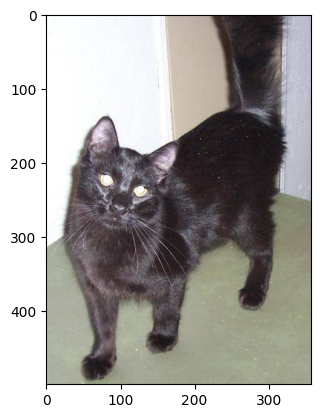

In [8]:
#print output in jupyter notebook instead of opening new window then print
%pylab inline
img=mpimg.imread('/content/training_set/training_set/cats/cat.1021.jpg')
imgplot=plt.imshow(img)
plt.show()

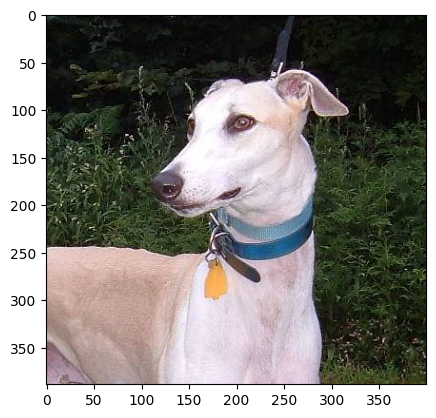

In [9]:
#print output in jupyter notebook instead of opening new window then print
img=mpimg.imread('/content/training_set/training_set/dogs/dog.3999.jpg')
imgplot=plt.imshow(img)
plt.show()

### Designing the Model

#### microsoft/resnet-50

- Model Name - microsoft/resnet-50
- Model Trained on - COCO Dataset
- Description : this model to classify an image of the COCO 2017 dataset into one of the 1,000 ImageNet classes.

In [10]:
# https://huggingface.co/microsoft/resnet-50
# below conent is from above link

from transformers import AutoImageProcessor, ResNetForImageClassification
import torch
from datasets import load_dataset

#Start
#added by me
from tensorflow.keras.utils import load_img # for image processing
#End

dataset = load_dataset("huggingface/cats-image")
image = dataset["test"]["image"][0] # pre-loaded image in model

# Start
#added by me to predict the image Cat or Dog
#/content/training_set/training_set/dogs/dog.10.jpg
#/content/training_set/training_set/cats/cat.1021.jpg
#/content/training_set/training_set/cats/cat.10.jpg
image = load_img('/content/training_set/training_set/cats/cat.10.jpg')
#End

processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")
model = ResNetForImageClassification.from_pretrained("microsoft/resnet-50")

inputs = processor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for huggingface/cats-image contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/huggingface/cats-image.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating test split: 0 examples [00:00, ? examples/s]

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

tabby, tabby cat


## Fine tune to need

### Designing the Model

#### VGG16

In [11]:
# Cover in below
#Ed AI _DL_M7_inclass_Classifying Dog and Cat using CNN on Tensorflow 2.x.ipynb
#VGG16 model

## HuggingFace Pipeline

- https://huggingface.co/docs/transformers/en/main_classes/pipelines
- fill-mask
- NER[name entity recognition]
- question-answering
- sentiment-analysis
- summarization
- text-generation
- translation
- zero-shot-classification etc.

In [13]:
from transformers import pipeline
#classifier = pipeline("sentiment-analysis") # it will pickup any random model
classifier = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
classifier("I've been waiting for a HuggingFace course my whole life.")

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'label': '5 stars', 'score': 0.4398402273654938}]

In [14]:
text_generate = pipeline("text-generation",model = "distilbert/distilgpt2")
text_generate("write a text  blog about pyhton tuple" , max_length = 500,num_return_sequences=2)

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "write a text  blog about pyhton tuple.\n\n\nTo summarize, here are a few of the things I did to avoid using PyHton instead of PyHton.\nAnd here are many things I went through to avoid using PyHton when using PyHton in general, which makes the system much nicer.\nThese are some things that should be avoided when using PyHton in general in general, which makes the system much nicer.\nThe most obvious thing that has changed are:\nimport pyhash >>> from pyhton >>> from pyhton\nAnd that’s basically a list of items in a single file:\nimport pyhash >>> import pyhash >>> from pyhton >>> from pyhton >>> PythonHash >>> from pyhton >>> >>> >>> PyHton\nThis should not be a huge problem as we will not use PyHton to fetch any of these items in a single file, which leads to one important thing: you can run the first few file types in PyHton and then rerun every one of these ones and start doing the rest of them by using them!\nHere’s a PythonHash object:\nimport PyKey >>> import 